# QuatIca Core Functionality Demo

This notebook demonstrates all the core functionality examples from the README.
Run each cell to see the code in action!

## Setup and Imports

In [1]:
import sys
import os
import numpy as np
import quaternion
import matplotlib.pyplot as plt

In [2]:
# Add the core module to the path
sys.path.append('core')

In [3]:
print("✅ All imports successful!")

✅ All imports successful!


## 1. Basic Matrix Operations

In [4]:
from core.utils import quat_matmat, quat_frobenius_norm
from core.data_gen import create_test_matrix

In [5]:
# Create test matrices
A = create_test_matrix(3, 4)
B = create_test_matrix(4, 2)

In [6]:
print("Matrix A shape:", A.shape)
print("Matrix B shape:", B.shape)
print("Matrix A norm:", quat_frobenius_norm(A))
print("Matrix B norm:", quat_frobenius_norm(B))

Matrix A shape: (3, 4)
Matrix B shape: (4, 2)
Matrix A norm: 20.388029957095416
Matrix B norm: 14.957689728949102


In [7]:
# Matrix multiplication
C = quat_matmat(A, B)
print("Matrix C = A @ B shape:", C.shape)
print("Matrix C norm:", quat_frobenius_norm(C))

Matrix C = A @ B shape: (3, 2)
Matrix C norm: 187.74028684719906


In [8]:
print("✅ Basic matrix operations work!")

✅ Basic matrix operations work!


## 2. QR Decomposition

In [9]:
from core.decomp.qsvd import qr_qua

In [10]:
# Create a test matrix
X_quat = create_test_matrix(4, 3)
print("Input matrix X shape:", X_quat.shape)

Input matrix X shape: (4, 3)


In [11]:
# QR decomposition
Q, R = qr_qua(X_quat)
print("Q shape:", Q.shape)
print("R shape:", R.shape)

Q shape: (4, 3)
R shape: (3, 3)


In [12]:
# Verify reconstruction
X_recon = quat_matmat(Q, R)
reconstruction_error = quat_frobenius_norm(X_quat - X_recon)
print("Reconstruction error:", reconstruction_error)

Reconstruction error: 4.116536456133288e-15


In [13]:
print("✅ QR decomposition works!")

✅ QR decomposition works!


## 3. Quaternion SVD (Q-SVD)

In [14]:
from core.decomp.qsvd import classical_qsvd, classical_qsvd_full

In [15]:
# Create a test matrix
X_quat = create_test_matrix(5, 4)
print("Input matrix X shape:", X_quat.shape)

Input matrix X shape: (5, 4)


In [16]:
# Truncated Q-SVD
R = 2  # Target rank
U, s, V = classical_qsvd(X_quat, R)
print("Truncated Q-SVD:")
print("  U shape:", U.shape)
print("  s length:", len(s))
print("  V shape:", V.shape)

Truncated Q-SVD:
  U shape: (5, 2)
  s length: 2
  V shape: (4, 2)


In [17]:
# Full Q-SVD
U_full, s_full, V_full = classical_qsvd_full(X_quat)
print("\nFull Q-SVD:")
print("  U_full shape:", U_full.shape)
print("  s_full length:", len(s_full))
print("  V_full shape:", V_full.shape)


Full Q-SVD:
  U_full shape: (5, 5)
  s_full length: 4
  V_full shape: (4, 4)


In [18]:
print("✅ Q-SVD works!")

✅ Q-SVD works!


## 4. Randomized Q-SVD

In [19]:
from core.decomp.qsvd import rand_qsvd
from core.utils import quat_hermitian

In [20]:
# Create a test matrix
X_quat = create_test_matrix(8, 6)
print("Input matrix X shape:", X_quat.shape)

Input matrix X shape: (8, 6)


In [21]:
# Randomized Q-SVD with different parameters
R = 3  # Target rank
print(f"Target rank R = {R}")

Target rank R = 3


In [22]:
# Test with different power iterations
for n_iter in [1, 2, 3]:
    print(f"\nTesting with {n_iter} power iteration(s):")
    
    U, s, V = rand_qsvd(X_quat, R, oversample=5, n_iter=n_iter)
    print(f"  U shape: {U.shape}")
    print(f"  V shape: {V.shape}")
    print(f"  s shape: {s.shape}")
    print(f"  Singular values: {s}")
    
    # Test reconstruction
    S_diag = np.diag(s)
    X_recon = quat_matmat(quat_matmat(U, S_diag), quat_hermitian(V))
    reconstruction_error = quat_frobenius_norm(X_quat - X_recon)
    relative_error = reconstruction_error / quat_frobenius_norm(X_quat)
    print(f"  Reconstruction error: {reconstruction_error:.6f}")
    print(f"  Relative error: {relative_error:.6f}")


Testing with 1 power iteration(s):
  U shape: (8, 3)
  V shape: (6, 3)
  s shape: (3,)
  Singular values: [51.02895766 36.94591366 23.20937361]
  Reconstruction error: 16.341576
  Relative error: 0.236495

Testing with 2 power iteration(s):
  U shape: (8, 3)
  V shape: (6, 3)
  s shape: (3,)
  Singular values: [51.02895766 36.94591366 23.20937361]
  Reconstruction error: 16.341576
  Relative error: 0.236495

Testing with 3 power iteration(s):
  U shape: (8, 3)
  V shape: (6, 3)
  s shape: (3,)
  Singular values: [51.02895766 36.94591366 23.20937361]
  Reconstruction error: 16.341576
  Relative error: 0.236495


In [23]:
# Test with full rank for perfect reconstruction
print(f"\nTesting with full rank (R = {min(X_quat.shape)}):")
U_full, s_full, V_full = rand_qsvd(X_quat, min(X_quat.shape), oversample=5, n_iter=2)
S_full_diag = np.diag(s_full)
X_recon_full = quat_matmat(quat_matmat(U_full, S_full_diag), quat_hermitian(V_full))
reconstruction_error_full = quat_frobenius_norm(X_quat - X_recon_full)
print(f"  Full rank reconstruction error: {reconstruction_error_full:.2e}")


Testing with full rank (R = 6):
  Full rank reconstruction error: 1.58e-13


In [24]:
print("✅ Randomized Q-SVD works!")

✅ Randomized Q-SVD works!


## 5. Eigenvalue Decomposition

In [25]:
from core.decomp import quaternion_eigendecomposition, quaternion_eigenvalues, quaternion_eigenvectors
from core.utils import quat_hermitian

In [26]:
# Create a Hermitian matrix A = B^H @ B
B = create_test_matrix(4, 3)
B_H = quat_hermitian(B)
A_quat = quat_matmat(B_H, B)
print("Hermitian matrix A shape:", A_quat.shape)

Hermitian matrix A shape: (3, 3)


In [27]:
# Full eigendecomposition
eigenvalues, eigenvectors = quaternion_eigendecomposition(A_quat)
print("Full eigendecomposition:")
print("  Number of eigenvalues:", len(eigenvalues))
print("  Eigenvectors shape:", eigenvectors.shape)

Full eigendecomposition:
  Number of eigenvalues: 3
  Eigenvectors shape: (3, 3)


In [28]:
# Extract only eigenvalues
eigenvals = quaternion_eigenvalues(A_quat)
print("\nEigenvalues only:", len(eigenvals))


Eigenvalues only: 3


In [29]:
# Extract only eigenvectors
eigenvecs = quaternion_eigenvectors(A_quat)
print("Eigenvectors only shape:", eigenvecs.shape)

Eigenvectors only shape: (3, 3)


In [30]:
# Verify eigenvalues are real
imaginary_parts = np.imag(eigenvalues)
max_imag = np.max(np.abs(imaginary_parts))
print("Maximum imaginary part:", max_imag)

Maximum imaginary part: 7.542835558780462e-32


In [31]:
print("✅ Eigenvalue decomposition works!")

✅ Eigenvalue decomposition works!


## 6. LU Decomposition

In [32]:
from core.decomp import quaternion_lu, verify_lu_decomposition

# Create a test matrix (set to 300x600 to validate rectangular LU)
A = create_test_matrix(300, 600)
print("Matrix A shape:", A.shape)

Matrix A shape: (300, 600)


In [33]:
# LU decomposition
L, U = quaternion_lu(A)
print("LU decomposition:")
print("  L shape:", L.shape)
print("  U shape:", U.shape)

LU decomposition:
  L shape: (300, 300)
  U shape: (300, 600)


In [34]:
# Verify reconstruction (A = L @ U)
LU = quat_matmat(L, U)
reconstruction_error = quat_frobenius_norm(A - LU)
relative_error = reconstruction_error / quat_frobenius_norm(A)
print("  Reconstruction error:", reconstruction_error)
print("  Relative error:", relative_error)

  Reconstruction error: 41531.050694954
  Relative error: 1.413535445979973


In [35]:
# Test with permutation matrix
L_p, U_p, P = quaternion_lu(A, return_p=True)
print("\nWith permutation matrix:")
print("  P shape:", P.shape)
PA = quat_matmat(P, A)
LU_p = quat_matmat(L_p, U_p)
permutation_error = quat_frobenius_norm(PA - LU_p)
print("  P*A = L*U error:", permutation_error)


With permutation matrix:
  P shape: (300, 300)
  P*A = L*U error: 2.9829420466786597e-10


In [36]:
# Test the alternative form: A = (P^T * L) * U
P_T = quat_hermitian(P)  # P^T
P_T_L = quat_matmat(P_T, L_p)  # P^T * L
A_recon_alt = quat_matmat(P_T_L, U_p)  # (P^T * L) * U
alt_error = quat_frobenius_norm(A - A_recon_alt)
print("  A = (P^T * L) * U error:", alt_error)

  A = (P^T * L) * U error: 2.9829420466786597e-10


In [37]:
# Structural checks on pivoted factors (valid for rectangular matrices):
N = min(A.shape[0], A.shape[1])

# L_p should be lower-triangular (lower-trapezoidal) with unit diagonal on the leading N×N block
L_p_real = quaternion.as_float_array(L_p)[:, :, 0]
is_Lp_lower = np.allclose(L_p_real, np.tril(L_p_real), atol=1e-12)
unit_diag = np.allclose(np.diag(L_p_real[:N, :N]), np.ones(N), atol=1e-12)
print("  L (pivoted) is lower-triangular:", is_Lp_lower)
print("  L (pivoted) has unit diagonal (first N):", unit_diag)

# U_p (N×n) should be upper-triangular (upper-trapezoidal)
U_p_real = quaternion.as_float_array(U_p)[:, :, 0]
is_Up_upper = np.allclose(U_p_real, np.triu(U_p_real), atol=1e-12)
print("  U (pivoted) is upper-triangular:", is_Up_upper)

# Check if P^T * L is lower triangular (only when no pivoting needed)
P_T_L_float = quaternion.as_float_array(P_T_L)
P_T_L_real = P_T_L_float[:, :, 0]
is_P_T_L_lower_triangular = np.allclose(P_T_L_real, np.tril(P_T_L_real), atol=1e-12)
print("  P^T * L is lower triangular:", is_P_T_L_lower_triangular, "(only when no pivoting needed)")

print("✅ LU decomposition works!")

  L (pivoted) is lower-triangular: True
  L (pivoted) has unit diagonal (first N): True
  U (pivoted) is upper-triangular: True
  P^T * L is lower triangular: False (only when no pivoting needed)
✅ LU decomposition works!


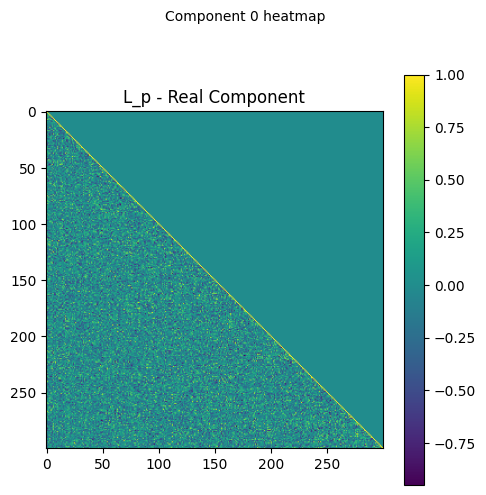

In [38]:
from core.visualization import Visualizer
Visualizer.visualize_matrix(L_p, component=0, title="L_p - Real Component")


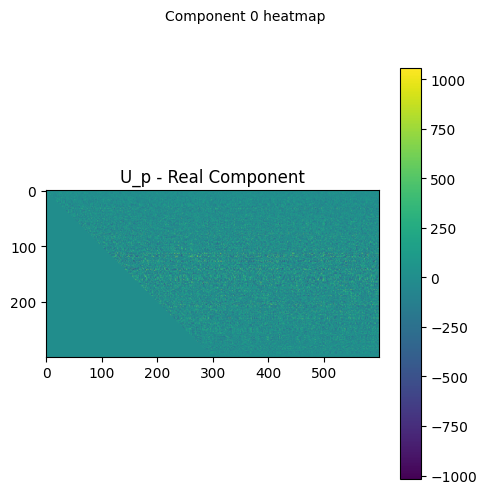

In [39]:
Visualizer.visualize_matrix(U_p, component=0, title="U_p - Real Component")


## 7. Tridiagonalization

In [40]:
from core.decomp import tridiagonalize

In [41]:
# Use the same Hermitian matrix from above
print("Hermitian matrix A shape:", A_quat.shape)

Hermitian matrix A shape: (3, 3)


In [42]:
# Tridiagonalize
P, B_tridiag = tridiagonalize(A_quat)
print("Tridiagonalization:")
print("  P shape:", P.shape)
print("  B shape:", B_tridiag.shape)

Tridiagonalization:
  P shape: (3, 3)
  B shape: (3, 3)


In [43]:
# Verify transformation
P_H = quat_hermitian(P)
PAP_H = quat_matmat(quat_matmat(P, A_quat), P_H)
transformation_error = quat_frobenius_norm(PAP_H - B_tridiag)
print("  Transformation error:", transformation_error)

  Transformation error: 5.250305990841204e-14


In [44]:
print("✅ Tridiagonalization works!")

✅ Tridiagonalization works!


## 8. Pseudoinverse Computation

In [45]:
from core.solver import NewtonSchulzPseudoinverse

In [46]:
# Create a test matrix
A = create_test_matrix(3, 4)
print("Matrix A shape:", A.shape)

Matrix A shape: (3, 4)


In [47]:
# Compute pseudoinverse
solver = NewtonSchulzPseudoinverse()
A_pinv, residuals, covariances = solver.compute(A)
print("Pseudoinverse A^† shape:", A_pinv.shape)

Pseudoinverse A^† shape: (4, 3)


In [48]:
# Verify pseudoinverse properties
A_pinv_H = quat_hermitian(A_pinv)
print("A^† shape:", A_pinv.shape)
print("A^†^† shape:", A_pinv_H.shape)

A^† shape: (4, 3)
A^†^† shape: (3, 4)


In [49]:
print("✅ Pseudoinverse computation works!")

✅ Pseudoinverse computation works!


## 9. Linear System Solving

In [50]:
from core.solver import QGMRESSolver

In [51]:
# Create a square system A * x = b
A = create_test_matrix(3, 3)
b = create_test_matrix(3, 1)
print("System A shape:", A.shape)
print("Right-hand side b shape:", b.shape)

System A shape: (3, 3)
Right-hand side b shape: (3, 1)


In [52]:
# Solve using Q-GMRES
solver = QGMRESSolver()
x, info = solver.solve(A, b)
print("Solution x shape:", x.shape)
print("Convergence info:", info)

Solution x shape: (3, 1)
Convergence info: {'iterations': 3, 'residual': np.float64(3.7996919348744307e-16), 'residual_history': [[1, np.float64(0.9254343536776765), np.float64(0.9254343536776766)], [2, np.float64(0.5798644935172936), np.float64(0.5366265227788101)], [3, np.float64(5.8463596286091955e-16), np.float64(3.7996919348744307e-16)]], 'converged': np.True_, 'V0': array([[-0.19003126,  0.30622462, -0.43419284],
       [ 0.16292019, -0.10353124, -0.21105297],
       [ 0.25265592,  0.18345704,  0.15412779]]), 'V1': array([[-0.31558884, -0.10119441, -0.08542465],
       [ 0.20056397, -0.17539845,  0.10915854],
       [ 0.16219715, -0.55582164, -0.21559201]]), 'V2': array([[-0.40340267, -0.48128872, -0.04362171],
       [-0.2844067 ,  0.03602704, -0.460223  ],
       [-0.17778298,  0.3235411 ,  0.44320413]]), 'V3': array([[-0.11410818,  0.2378299 , -0.31400324],
       [-0.60274843, -0.15742683,  0.39142001],
       [-0.23627519,  0.30487171, -0.12465692]])}


In [53]:
# Verify solution
Ax = quat_matmat(A, x)
residual = quat_frobenius_norm(Ax - b)
print("Residual ||A*x - b||:", residual)

Residual ||A*x - b||: 2.55667875010731e-15


In [54]:
print("✅ Linear system solving works!")

✅ Linear system solving works!


## 10. Visualization

In [55]:
from core.visualization import Visualizer

In [56]:
# Create a test matrix
A = create_test_matrix(4, 4)
print("Matrix A shape:", A.shape)

Matrix A shape: (4, 4)


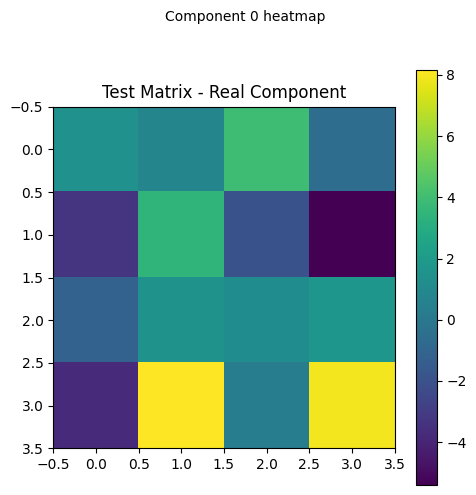

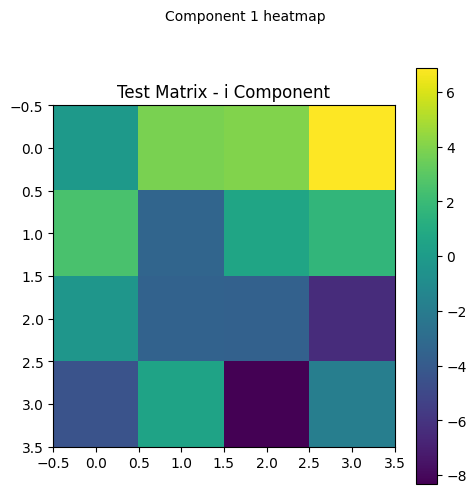

In [57]:
# Plot matrix components
Visualizer.visualize_matrix(A, component=0, title="Test Matrix - Real Component")
Visualizer.visualize_matrix(A, component=1, title="Test Matrix - i Component")

In [58]:
print("✅ Visualization works!")

✅ Visualization works!


## 11. Determinant and Rank Computation

In [59]:
from core.utils import det, rank
from core.data_gen import generate_random_unitary_matrix

In [60]:
print("\n" + "="*60)
print("DETERMINANT AND RANK COMPUTATION DEMONSTRATIONS")
print("="*60)


DETERMINANT AND RANK COMPUTATION DEMONSTRATIONS


### 10.1 Determinant Demo: Unitary Matrix with Known Determinant

In [61]:
print("\n--- Determinant Demo: Unitary Matrix ---")


--- Determinant Demo: Unitary Matrix ---


In [62]:
# Generate a random unitary matrix (determinant should be 1)
n = 4
U = generate_random_unitary_matrix(n)
print(f"Generated unitary matrix U of size {n}×{n}")

Generated unitary matrix U of size 4×4


In [63]:
# Compute Dieudonné determinant
det_dieudonne = det(U, 'Dieudonne')
print(f"Dieudonné determinant: {det_dieudonne:.6f}")

Dieudonné determinant: 1.000000


In [64]:
# Expected determinant for unitary matrix should be close to 1
expected_det = 1.0
error = abs(det_dieudonne - expected_det)
print(f"Expected determinant: {expected_det}")
print(f"Absolute error: {error:.2e}")

Expected determinant: 1.0
Absolute error: 8.88e-16


In [65]:
if error < 1e-10:
    print("✅ Determinant computation works correctly!")
else:
    print("❌ Determinant computation has issues!")

✅ Determinant computation works correctly!


### 10.2 Rank Demo: Matrix Product with Known Rank

In [66]:
print("\n--- Rank Demo: Matrix Product ---")


--- Rank Demo: Matrix Product ---


In [67]:
# Create matrices A (m×r) and B (r×n) with known rank r
m, r, n = 5, 3, 4
A = create_test_matrix(m, r)
B = create_test_matrix(r, n)
print(f"Matrix A: {m}×{r}")
print(f"Matrix B: {r}×{n}")

Matrix A: 5×3
Matrix B: 3×4


In [68]:
# Compute product C = A @ B
C = quat_matmat(A, B)
print(f"Matrix C = A @ B: {C.shape}")

Matrix C = A @ B: (5, 4)


In [69]:
# Compute rank of C
computed_rank = rank(C)
expected_rank = r
print(f"Computed rank of C: {computed_rank}")
print(f"Expected rank: {expected_rank}")

Computed rank of C: 3
Expected rank: 3


In [70]:
if computed_rank == expected_rank:
    print("✅ Rank computation works correctly!")
else:
    print("❌ Rank computation has issues!")

✅ Rank computation works correctly!


### 10.3 Additional Rank Examples

In [71]:
print("\n--- Additional Rank Examples ---")


--- Additional Rank Examples ---


In [72]:
# Test full-rank matrix
full_rank_matrix = create_test_matrix(4, 4)
full_rank = rank(full_rank_matrix)
print(f"Full-rank 4×4 matrix: rank = {full_rank} (expected: 4)")

Full-rank 4×4 matrix: rank = 4 (expected: 4)


In [73]:
# Test zero matrix
zero_matrix = np.zeros((3, 3), dtype=np.quaternion)
zero_rank = rank(zero_matrix)
print(f"Zero 3×3 matrix: rank = {zero_rank} (expected: 0)")

Zero 3×3 matrix: rank = 0 (expected: 0)


In [74]:
# Test identity matrix
identity_matrix = np.eye(5, dtype=np.quaternion)
identity_rank = rank(identity_matrix)
print(f"Identity 5×5 matrix: rank = {identity_rank} (expected: 5)")

Identity 5×5 matrix: rank = 5 (expected: 5)


In [75]:
print("✅ All rank examples work correctly!")

✅ All rank examples work correctly!


## 12. Power Iteration for Dominant Eigenvector

In [76]:
from core.utils import power_iteration
from core.decomp.eigen import quaternion_eigendecomposition

In [77]:
print("\n" + "="*60)
print("POWER ITERATION FOR DOMINANT EIGENVECTOR")
print("="*60)


POWER ITERATION FOR DOMINANT EIGENVECTOR


### 11.1 Power Iteration Demo: Comparison with Eigendecomposition

In [78]:
print("\n--- Power Iteration vs Eigendecomposition ---")


--- Power Iteration vs Eigendecomposition ---


In [79]:
# Create Hermitian matrix: A = B^H @ B (positive definite)
B = create_test_matrix(5, 5)
A = quat_matmat(quat_hermitian(B), B)
print(f"Created Hermitian matrix A of size {A.shape}")

Created Hermitian matrix A of size (5, 5)


In [80]:
# Run power iteration
print("\nRunning power iteration...")
power_eigenvector, power_eigenvalue = power_iteration(A, return_eigenvalue=True, verbose=True)


Running power iteration...
Iteration 0: norm_diff = 8.03e-01
Iteration 1: norm_diff = 2.10e-01
Iteration 2: norm_diff = 4.57e-02
Iteration 3: norm_diff = 9.74e-03
Iteration 4: norm_diff = 2.08e-03
Iteration 5: norm_diff = 4.42e-04
Iteration 6: norm_diff = 9.42e-05
Iteration 7: norm_diff = 2.01e-05
Iteration 8: norm_diff = 4.28e-06
Iteration 9: norm_diff = 9.12e-07
Iteration 10: norm_diff = 1.94e-07
Iteration 11: norm_diff = 4.14e-08
Iteration 12: norm_diff = 8.82e-09
Iteration 13: norm_diff = 1.88e-09
Iteration 14: norm_diff = 4.00e-10
Iteration 15: norm_diff = 8.53e-11
Converged at iteration 15 with norm_diff = 8.53e-11


In [81]:
# Run eigendecomposition
print("\nRunning eigendecomposition...")
eigenvalues, eigenvectors = quaternion_eigendecomposition(A, verbose=False)


Running eigendecomposition...


In [82]:
# Find dominant eigenvalue and eigenvector
dominant_idx = np.argmax(np.abs(eigenvalues))
dominant_eigenvalue = eigenvalues[dominant_idx]
dominant_eigenvector = eigenvectors[:, dominant_idx:dominant_idx+1]

In [83]:
print(f"\nComparison Results:")
print(f"Power iteration eigenvalue: {power_eigenvalue:.6f}")
print(f"Eigendecomposition dominant eigenvalue: {dominant_eigenvalue:.6f}")
print(f"Eigenvalue difference: {abs(power_eigenvalue - abs(dominant_eigenvalue)):.2e}")


Comparison Results:
Power iteration eigenvalue: 1367.874750
Eigendecomposition dominant eigenvalue: 1367.874750-0.000000j
Eigenvalue difference: 4.55e-13


In [84]:
# Compare eigenvectors
power_norm = quat_frobenius_norm(power_eigenvector)
decomp_norm = quat_frobenius_norm(dominant_eigenvector)

In [85]:
power_normalized = power_eigenvector / power_norm
decomp_normalized = dominant_eigenvector / decomp_norm

In [86]:
dot_product = quat_matmat(quat_hermitian(power_normalized), decomp_normalized)
dot_product_norm = quat_frobenius_norm(dot_product)

In [87]:
print(f"Eigenvector alignment: {dot_product_norm:.6f}")

Eigenvector alignment: 1.000000


In [88]:
# Verify results
eigenvalue_error = abs(power_eigenvalue - abs(dominant_eigenvalue))
eigenvector_error = abs(dot_product_norm - 1.0)

In [89]:
if eigenvalue_error < 1e-6 and eigenvector_error < 1e-6:
    print("✅ Power iteration matches eigendecomposition perfectly!")
else:
    print("❌ Power iteration has issues!")

✅ Power iteration matches eigendecomposition perfectly!


### 11.2 Power Iteration Performance Across Sizes

In [90]:
print("\n--- Performance Across Matrix Sizes ---")


--- Performance Across Matrix Sizes ---


In [91]:
sizes = [3, 6, 9]
for size in sizes:
    print(f"\nTesting {size}×{size} matrix:")
    
    # Create test matrix
    B = create_test_matrix(size, size)
    A = quat_matmat(quat_hermitian(B), B)
    
    # Time power iteration
    import time
    start_time = time.time()
    eigenvector, eigenvalue = power_iteration(A, return_eigenvalue=True, verbose=False)
    power_time = time.time() - start_time
    
    # Time eigendecomposition
    start_time = time.time()
    eigenvalues, eigenvectors = quaternion_eigendecomposition(A, verbose=False)
    decomp_time = time.time() - start_time
    
    print(f"  Power iteration: {power_time:.3f}s")
    print(f"  Eigendecomposition: {decomp_time:.3f}s")
    print(f"  Speedup: {decomp_time/power_time:.1f}x faster")


Testing 3×3 matrix:
  Power iteration: 0.000s
  Eigendecomposition: 0.001s
  Speedup: 2.2x faster

Testing 6×6 matrix:
  Power iteration: 0.001s
  Eigendecomposition: 0.001s
  Speedup: 0.9x faster

Testing 9×9 matrix:
  Power iteration: 0.001s
  Eigendecomposition: 0.001s
  Speedup: 1.5x faster


In [92]:
print("✅ Power iteration performance analysis complete!")

✅ Power iteration performance analysis complete!



HESSENBERG FORM (UPPER HESSENBERG REDUCTION)
Random matrix X shape: (200, 200)
Hessenberg reduction:
  P shape: (200, 200)
  H shape: (200, 200)
  P is unitary (P^H P = I): True
  Similarity error ||P X P^H - H||_F: 8.51e-11
  is_hessenberg(H): True


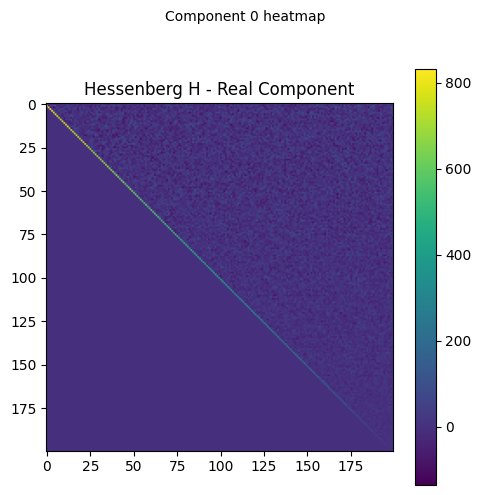

In [93]:
# 13. Hessenberg Form (Upper Hessenberg Reduction)
from core.decomp.hessenberg import hessenbergize, is_hessenberg
from core.utils import quat_hermitian, quat_matmat, quat_frobenius_norm, quat_eye
from core.data_gen import create_test_matrix
from core.visualization import Visualizer
import numpy as np

print("\n" + "="*60)
print("HESSENBERG FORM (UPPER HESSENBERG REDUCTION)")
print("="*60)

# Create a random quaternion matrix
X = create_test_matrix(200, 200)
print("Random matrix X shape:", X.shape)

# Compute Hessenberg form
P_hess, H = hessenbergize(X)
print("Hessenberg reduction:")
print("  P shape:", P_hess.shape)
print("  H shape:", H.shape)

# Verify unitarity of P: P^H P = I
P_hess_H = quat_hermitian(P_hess)
I_check = quat_matmat(P_hess_H, P_hess)
print("  P is unitary (P^H P = I):", np.allclose(I_check, quat_eye(P_hess.shape[0]), atol=1e-10))

# Verify similarity relation: H = P * X * P^H
PX = quat_matmat(P_hess, X)
PXPH = quat_matmat(PX, P_hess_H)
print(f"  Similarity error ||P X P^H - H||_F: {quat_frobenius_norm(PXPH - H):.2e}")

# Check Hessenberg structure
print("  is_hessenberg(H):", is_hessenberg(H))

# Visualize the real component to illustrate Hessenberg pattern
Visualizer.visualize_matrix(H, component=0, title="Hessenberg H - Real Component")


## Summary

In [94]:
print("🎉 ALL CORE FUNCTIONALITY TESTS COMPLETED SUCCESSFULLY!")
print("\n✅ Basic matrix operations")
print("✅ QR decomposition")
print("✅ Quaternion SVD (Q-SVD)")
print("✅ Randomized Q-SVD")
print("✅ Eigenvalue decomposition")
print("✅ Tridiagonalization")
print("✅ Pseudoinverse computation")
print("✅ Linear system solving")
print("✅ Visualization")
print("✅ Determinant computation")
print("✅ Rank computation")
print("✅ Power iteration")
print("✅ Hessenberg form")
print("\nThe code examples in the README are working correctly! 🚀") 

🎉 ALL CORE FUNCTIONALITY TESTS COMPLETED SUCCESSFULLY!

✅ Basic matrix operations
✅ QR decomposition
✅ Quaternion SVD (Q-SVD)
✅ Randomized Q-SVD
✅ Eigenvalue decomposition
✅ Tridiagonalization
✅ Pseudoinverse computation
✅ Linear system solving
✅ Visualization
✅ Determinant computation
✅ Rank computation
✅ Power iteration
✅ Hessenberg form

The code examples in the README are working correctly! 🚀


## Schur Decomposition (Experimental)

- Hermitian

In [ ]:
# Hermitian Schur demo: validate diagonal T
import importlib
import core.decomp.schur as _schur
importlib.reload(_schur)
quaternion_schur_unified = _schur.quaternion_schur_unified

from core.utils import quat_matmat, quat_hermitian, quat_frobenius_norm
from core.data_gen import create_test_matrix
import numpy as np, quaternion, matplotlib.pyplot as plt

n_herm = 50
B = create_test_matrix(n_herm, n_herm)
A_herm = quat_matmat(quat_hermitian(B), B)
Qh, Th, diagh = quaternion_schur_unified(A_herm, variant="rayleigh", max_iter=1500, tol=1e-10, return_diagnostics=True, precompute_shifts=True, power_shift_steps=5)

# Visualize T real component; should be (nearly) diagonal
# Visualize T real component; should be (nearly) diagonal
from core.visualization import Visualizer
Visualizer.visualize_matrix(Th, component=0, title="Th - Real Component")
Visualizer.visualize_matrix(Th, component=1, title="Th - i Component")


# Print validation metrics
max_sub = 0.0
for i in range(1, n_herm):
    h = Th[i, i-1]
    sv = (h.w*h.w + h.x*h.x + h.y*h.y + h.z*h.z)**0.5
    if sv > max_sub:
        max_sub = sv
below = 0.0
for i in range(n_herm):
    for j in range(0, i):
        q = Th[i, j]
        below = max(below, (q.w*q.w + q.x*q.x + q.y*q.y + q.z*q.z)**0.5)
sim = quat_frobenius_norm(quat_matmat(quat_hermitian(Qh), quat_matmat(A_herm, Qh)) - Th)
unit = quat_frobenius_norm(quat_matmat(quat_hermitian(Qh), Qh) - np.eye(n_herm, dtype=np.quaternion))
print(f"Max subdiagonal magnitude: {max_sub:.3e} | below_diag_max={below:.3e} ")
print(f"Similarity error ||Q^H A Q - T||_F: {sim:.3e}")
print(f"Unitarity error ||Q^H Q - I||_F: {unit:.3e}")


Estimated dominant complex eigenvalue: (-145.0350304995537+2.2204460492503135e-15j)
As quaternion (x-axis subfield): quaternion(-145.035030499554, 2.22044604925031e-15, 0, 0)
Residual final: 7.906e-04 | steps: 398


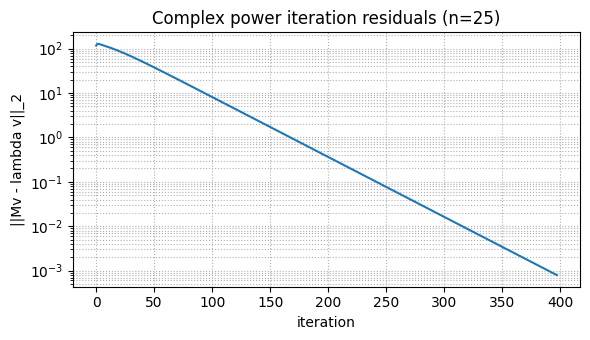

In [ ]:
# 12b. Non-Hermitian Complex Power Iteration (Experimental)
# This demo estimates a complex eigenvalue for a general (non-Hermitian) quaternion matrix
# using a fixed complex subfield via the complex adjoint mapping.

import sys, os
import numpy as np
import quaternion
import matplotlib.pyplot as plt

# Robust path setup for direct notebook execution
root = os.getcwd()
if root not in sys.path:
    sys.path.insert(0, root)
core_path = os.path.join(root, "core")
if core_path not in sys.path:
    sys.path.insert(0, core_path)

from core.data_gen import create_test_matrix
from core.utils import power_iteration_nonhermitian

n = 25
A_rand = create_test_matrix(n, n)
# A_rand = quat_matmat(quat_hermitian(A_rand),A_rand)
A_rand = (A_rand + quat_hermitian(A_rand))/2

q_vec, lambda_complex, residuals = power_iteration_nonhermitian(
    A_rand,
    max_iterations=3000,
    eig_tol=1e-12,
    res_tol=1e-10,
    seed=42,
    return_vector=True,
)

lam_q = quaternion.quaternion(float(np.real(lambda_complex)), float(np.imag(lambda_complex)), 0.0, 0.0)
print(f"Estimated dominant complex eigenvalue: {lambda_complex}")
print(f"As quaternion (x-axis subfield): {lam_q}")
print(f"Residual final: {residuals[-1] if residuals else float('nan'):.3e} | steps: {len(residuals)}")

plt.figure(figsize=(6, 3.5))
if residuals:
    plt.semilogy(residuals)
plt.title(f"Complex power iteration residuals (n={n})")
plt.xlabel("iteration")
plt.ylabel("||Mv - lambda v||_2")
plt.grid(True, which="both", ls=":")
plt.tight_layout()
plt.show()


In [ ]:
# 12c. Matrix Norms (Quaternion Matrices)
# Demonstrate Frobenius, induced 1-, induced infinity-, and spectral 2-norms

import numpy as np
import quaternion
from core.utils import (
    matrix_norm,
    quat_frobenius_norm,
    induced_matrix_norm_1,
    induced_matrix_norm_inf,
)

# Random rectangular quaternion matrix
m, n = 4, 5
A = quaternion.as_quat_array(np.random.randn(m, n, 4))

nf = matrix_norm(A, 'fro')
nf2 = quat_frobenius_norm(A)
n1 = matrix_norm(A, 1)
ninf = matrix_norm(A, np.inf)

print(f"Frobenius: {nf:.6f} (quat_frobenius_norm: {nf2:.6f})")
print(f"Induced 1-norm (max column sum): {n1:.6f}")
print(f"Induced inf-norm (max row sum): {ninf:.6f}")

# Spectral norm (square)
B = quaternion.as_quat_array(np.random.randn(5, 5, 4))
n2 = matrix_norm(B, 2)
print(f"Spectral 2-norm (largest singular value): {n2:.6f}")

# Simple inequalities (heuristic checks)
print("\nInequality checks (heuristic):")
print(f"  ||B||_2 <= sqrt(||B||_1 * ||B||_inf): {n2 <= np.sqrt(matrix_norm(B, 1) * matrix_norm(B, np.inf))}")
